## Intelligence of Dogs

Research Topic

Are bigger dogs smarter than smaller dogs?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from empiricaldist import Pmf
from empiricaldist import Cdf
import scipy.stats

pd.options.display.float_format = '{:.5f}'.format

In [2]:
# Import datasets

intelligence_df = pd.read_csv('dog_intelligence.csv')
akc_df = pd.read_csv('AKC_Breed_Info.csv', header = 0, encoding = 'unicode_escape')
heterozygosity_df = pd.read_csv('Table_4_Heterozygosity_85_breeds.csv')

In [3]:
# combine datasets
combined_df = pd.merge(intelligence_df, akc_df)
combined_df.dropna()

combined_df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs
0,Border Collie,Brightest Dogs,95%,1,4,19.00000,21.00000,40,40
1,Golden Retriever,Brightest Dogs,95%,1,4,21.00000,24.00000,55,75
2,Doberman Pinscher,Brightest Dogs,95%,1,4,26.00000,28.00000,60,100
3,Labrador Retriever,Brightest Dogs,95%,1,4,21.00000,24.00000,55,80
4,Papillon,Brightest Dogs,95%,1,4,8.00000,11.00000,5,10


In [4]:
combined_df = pd.merge(combined_df, heterozygosity_df, left_on = 'Breed', right_on = 'Population')
combined_df.head()

,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Population,Heterozygosity
0,Border Collie,Brightest Dogs,95%,1,4,19.00000,21.00000,40,40,Border Collie,0.54958
1,Golden Retriever,Brightest Dogs,95%,1,4,21.00000,24.00000,55,75,Golden Retriever,0.51778
2,Doberman Pinscher,Brightest Dogs,95%,1,4,26.00000,28.00000,60,100,Doberman Pinscher,0.38376
3,Labrador Retriever,Brightest Dogs,95%,1,4,21.00000,24.00000,55,80,Labrador Retriever,0.56059
4,Rottweiler,Brightest Dogs,95%,1,4,22.00000,27.00000,90,110,Rottweiler,0.45651


In [5]:
# Data Types
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               60 non-null     object 
 1   Classification      60 non-null     object 
 2   obey                51 non-null     object 
 3   reps_lower          60 non-null     int64  
 4   reps_upper          60 non-null     int64  
 5   height_low_inches   60 non-null     float64
 6   height_high_inches  60 non-null     float64
 7   weight_low_lbs      60 non-null     int64  
 8   weight_high_lbs     60 non-null     int64  
 9   Population          60 non-null     object 
 10  Heterozygosity      60 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 5.6+ KB


## Data Cleaning

In [6]:
# Convert obey, height and weight to numeric
combined_df['obey'] = combined_df['obey'].str.replace('%', '')
combined_df['obey'] = pd.to_numeric(combined_df['obey'], errors = 'coerce')
combined_df['height_low_inches'] = pd.to_numeric(combined_df['height_low_inches'], errors = 'coerce')
combined_df['height_high_inches'] = pd.to_numeric(combined_df['height_high_inches'], errors = 'coerce')
combined_df['weight_low_lbs'] = pd.to_numeric(combined_df['weight_low_lbs'], errors = 'coerce')
combined_df['weight_high_lbs'] = pd.to_numeric(combined_df['weight_high_lbs'], errors = 'coerce')

In [16]:
# Create average of height, weight, reps
combined_df['avg_height'] = combined_df[['height_low_inches', 'height_high_inches']].mean(axis = 1)
combined_df['avg_weight'] = combined_df[['weight_low_lbs', 'weight_high_lbs']].mean(axis = 1)
combined_df['avg_reps'] = combined_df[['reps_lower', 'reps_upper']].mean(axis = 1)
combined_df['obey'] = combined_df['obey']  / 100

In [17]:
# Data Types
combined_df.info()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               60 non-null     object 
 1   Classification      60 non-null     object 
 2   obey                51 non-null     float64
 3   reps_lower          60 non-null     int64  
 4   reps_upper          60 non-null     int64  
 5   height_low_inches   60 non-null     float64
 6   height_high_inches  60 non-null     float64
 7   weight_low_lbs      60 non-null     int64  
 8   weight_high_lbs     60 non-null     int64  
 9   Population          60 non-null     object 
 10  Heterozygosity      60 non-null     float64
 11  avg_height          60 non-null     float64
 12  avg_weight          60 non-null     float64
 13  avg_reps            60 non-null     float64
dtypes: float64(7), int64(4), object(3)
memory usage: 7.0+ KB


,Breed,Classification,obey,reps_lower,reps_upper,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,Population,Heterozygosity,avg_height,avg_weight,avg_reps
0,Border Collie,Brightest Dogs,0.95000,1,4,19.00000,21.00000,40,40,Border Collie,0.54958,20.00000,40.00000,2.50000
1,Golden Retriever,Brightest Dogs,0.95000,1,4,21.00000,24.00000,55,75,Golden Retriever,0.51778,22.50000,65.00000,2.50000
2,Doberman Pinscher,Brightest Dogs,0.95000,1,4,26.00000,28.00000,60,100,Doberman Pinscher,0.38376,27.00000,80.00000,2.50000
3,Labrador Retriever,Brightest Dogs,0.95000,1,4,21.00000,24.00000,55,80,Labrador Retriever,0.56059,22.50000,67.50000,2.50000
4,Rottweiler,Brightest Dogs,0.95000,1,4,22.00000,27.00000,90,110,Rottweiler,0.45651,24.50000,100.00000,2.50000


## 5 Variables for Analysis

1. avg_height: Average Height
2. avg_weight: Average Weight
3. avg_reps: Average number of commands
4. obey: percentage obeyed commands
5. Heterozygosity: Heterozygosity

## Descriptive Statistics

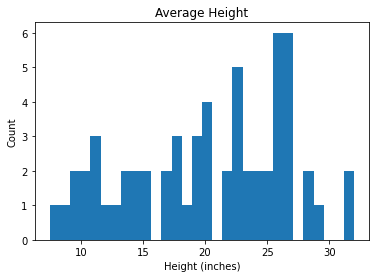

Mean: 20.216666666666665
Median: 21.0
Standard Deviation: 6.316886539708905


In [18]:
# Average Height
plt.hist(combined_df['avg_height'], bins = 30)
plt.title('Average Height')
plt.xlabel('Height (inches)')
plt.ylabel('Count')
plt.show()

print(f"Mean: {combined_df['avg_height'].mean()}")
print(f"Median: {combined_df['avg_height'].median()}")
print(f"Standard Deviation: {np.std(combined_df['avg_height'])}")

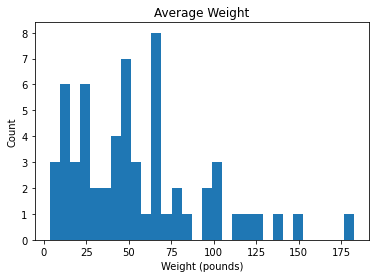

Mean: 55.641666666666666
Median: 50.0
Standard Deviation: 38.2938301891513


In [19]:
# Average Weight
plt.hist(combined_df['avg_weight'], bins = 30)
plt.title('Average Weight')
plt.xlabel('Weight (pounds)')
plt.ylabel('Count')
plt.show()

print(f"Mean: {combined_df['avg_weight'].mean()}")
print(f"Median: {combined_df['avg_weight'].median()}")
print(f"Standard Deviation: {np.std(combined_df['avg_weight'])}")

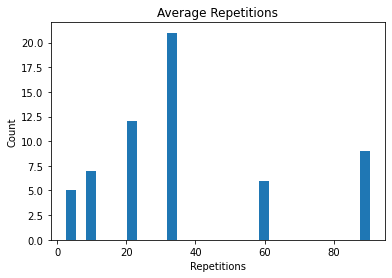

Mean: 36.65
Median: 33.0
Standard Deviation: 26.99495323203951


In [20]:
# Average Reps
plt.hist(combined_df['avg_reps'], bins = 30)
plt.title('Average Repetitions')
plt.xlabel('Repetitions')
plt.ylabel('Count')
plt.show()

print(f"Mean: {combined_df['avg_reps'].mean()}")
print(f"Median: {combined_df['avg_reps'].median()}")
print(f"Standard Deviation: {np.std(combined_df['avg_reps'])}")

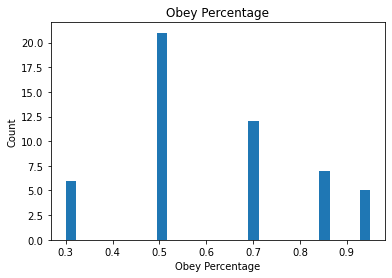

Mean: 0.6156862745098038
Median: 0.5
Standard Deviation: 0.19339338048530125


In [21]:
# Obey
plt.hist(combined_df['obey'], bins = 30)
plt.title('Obey Percentage')
plt.xlabel('Obey Percentage')
plt.ylabel('Count')
plt.show()

print(f"Mean: {combined_df['obey'].mean()}")
print(f"Median: {combined_df['obey'].median()}")
print(f"Standard Deviation: {np.std(combined_df['obey'])}")

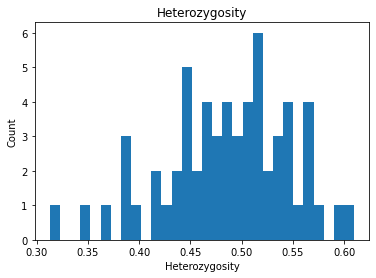

Mean: 0.4864505333333333
Median: 0.4922765
Standard Deviation: 0.061235132900557085


In [22]:
# Heterozygosity
plt.hist(combined_df['Heterozygosity'], bins = 30)
plt.title('Heterozygosity')
plt.xlabel('Heterozygosity')
plt.ylabel('Count')
plt.show()

print(f"Mean: {combined_df['Heterozygosity'].mean()}")
print(f"Median: {combined_df['Heterozygosity'].median()}")
print(f"Standard Deviation: {np.std(combined_df['Heterozygosity'])}")

## Compare Two Scenarios using a PMF for the Same Variable

I will compare the dogs with the classifications of above average, excellent and brightest to all others

In [28]:
intelligent_dogs = combined_df[combined_df['obey'] > .50]
other_dogs = combined_df[combined_df['obey'] <= .50]

Mean Weight for Intelligent Dogs: 54.854166666666664
Mean Weight for others: 53.592592592592595


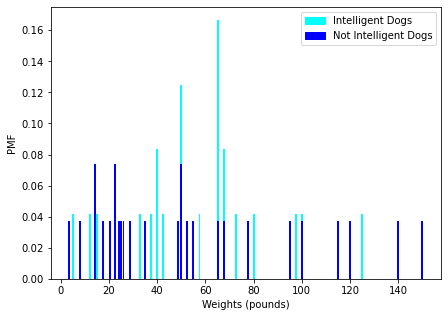

In [29]:
# Compare the PMF of the brightest dogs weights vs the rest
intelligent_pmf = Pmf.from_seq(intelligent_dogs['avg_weight'])
others_pmf = Pmf.from_seq(other_dogs['avg_weight'])

fig, ax = plt.subplots(1, 1, figsize = (7, 5))

intelligent = mpatches.Patch(color='cyan', label='Intelligent Dogs')
others = mpatches.Patch(color='blue', label='Not Intelligent Dogs')

ax.legend(handles=[intelligent, others ], )

plt.xlabel("Weights (pounds)")
plt.ylabel("PMF")

intelligent_pmf.bar(color=['cyan'])
others_pmf.bar(color=['blue'])

print(f"Mean Weight for Intelligent Dogs: {intelligent_pmf.mean()}")
print(f"Mean Weight for others: {others_pmf.mean()}")

Looking at the mean weights for both groups, they are basically equal. This indicates that dogs with an above average classification or higher doesnt necessarily have a larger weight than those average or below.

## CDF of Intelligent Dogs vs Others weights

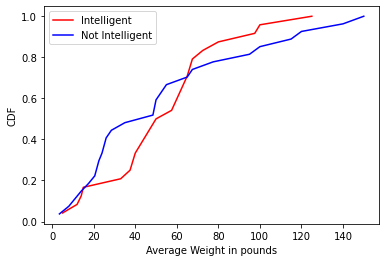

In [30]:
intelligent_cdf = Cdf.from_seq(intelligent_dogs['avg_weight'])
others_cdf = Cdf.from_seq(other_dogs['avg_weight'])

plt.plot(intelligent_cdf, color = 'red', label = 'Intelligent')
plt.plot(others_cdf, color = 'blue', label = 'Not Intelligent')

plt.xlabel('Average Weight in pounds')
plt.ylabel('CDF')

plt.legend()
plt.show()

Looking at the CDF non intelligent dogs are heavier up until about 60 lbs then the intelligent dogs are heavier.

## Analytical Model

((array([-2.27390067, -1.91302992, -1.70135682, -1.54640086, -1.42160977,
         -1.31571014, -1.2228056 , -1.13940346, -1.06325419, -0.99281837,
         -0.92699283, -0.86495764, -0.80608503, -0.74988229, -0.69595441,
         -0.64397882, -0.5936878 , -0.54485575, -0.49729007, -0.45082415,
         -0.40531215, -0.36062492, -0.31664678, -0.27327293, -0.23040741,
         -0.18796131, -0.14585132, -0.10399849, -0.06232713, -0.02076376,
          0.02076376,  0.06232713,  0.10399849,  0.14585132,  0.18796131,
          0.23040741,  0.27327293,  0.31664678,  0.36062492,  0.40531215,
          0.45082415,  0.49729007,  0.54485575,  0.5936878 ,  0.64397882,
          0.69595441,  0.74988229,  0.80608503,  0.86495764,  0.92699283,
          0.99281837,  1.06325419,  1.13940346,  1.2228056 ,  1.31571014,
          1.42160977,  1.54640086,  1.70135682,  1.91302992,  2.27390067]),
  array([  3.5,   5. ,   8. ,  12. ,  12.5,  14. ,  14. ,  14. ,  15. ,
          17.5,  20.5,  21. ,  22.5,  

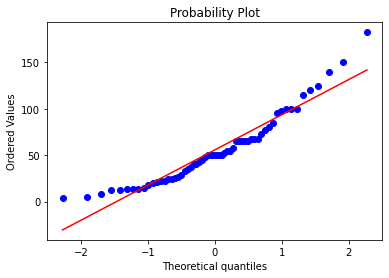

In [31]:
scipy.stats.probplot(combined_df['avg_weight'], dist="norm", plot = plt)

The plot for weight suggests it is skewed and it is not normally distributed.

## Scatterplots - Correlation and Causation

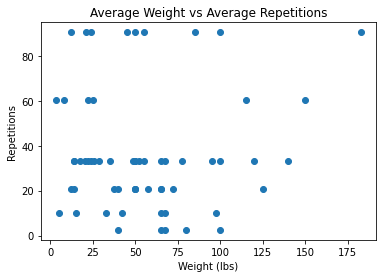

In [32]:
# Weight and average number of reps
plt.scatter(combined_df['avg_weight'], combined_df['avg_reps'])
plt.title('Average Weight vs Average Repetitions')
plt.xlabel('Weight (lbs)')
plt.ylabel('Repetitions')
plt.show()

In [33]:
# Relational Statistics
r = scipy.stats.pearsonr(combined_df['avg_weight'], combined_df['avg_reps'])[0]

pearson = scipy.stats.pearsonr(combined_df['avg_weight'], combined_df['avg_reps'])[0]
covariance = np.cov(combined_df['avg_weight'], combined_df['avg_reps'], bias = True)[0][1]

print(f"Pearson r: {pearson}")
print(f'R^2: {r**2}')
print(f'Covariance: {covariance}')

Pearson r: 0.05752533623710361
R^2: 0.0033091643091918256
Covariance: 59.466249999999995


The correlation is positive but not very high indicating that there is no real relationship between average weight and average repetitions

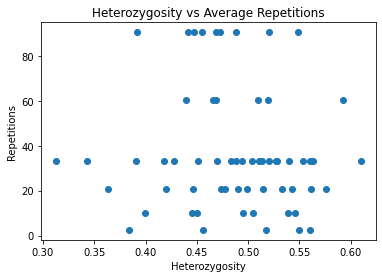

In [34]:
# Heterozygosity and average number of reps
plt.scatter(combined_df['Heterozygosity'], combined_df['avg_reps'])
plt.title('Heterozygosity vs Average Repetitions')
plt.xlabel('Heterozygosity')
plt.ylabel('Repetitions')
plt.show()

In [35]:
# Relational Statistics
r = scipy.stats.pearsonr(combined_df['Heterozygosity'], combined_df['avg_reps'])[0]

pearson = scipy.stats.pearsonr(combined_df['Heterozygosity'], combined_df['avg_reps'])[0]
covariance = np.cov(combined_df['Heterozygosity'], combined_df['avg_reps'], bias = True)[0][1]

print(f"Pearson r: {pearson}")
print(f'R^2: {r**2}')
print(f'Covariance: {covariance}')

Pearson r: -0.07516183652285069
R^2: 0.0056493016694877315
Covariance: -0.12424548833333351


The correlation is negative and not very high indicating there is really no relationship between Heterozygosity and average repetitions

## Hypothesis Testing

Null Hypothesis: There is a difference in weight between those dogs classified as above average (above 50%) and those below (50% and below).

In [36]:
intelligent_dogs = combined_df[combined_df['obey'] > .50]
other_dogs = combined_df[combined_df['obey'] <= .50]

In [41]:
corr = scipy.stats.pearsonr(intelligent_dogs['avg_weight'], other_dogs['avg_weight'])
corr[0]

ValueError: x and y must have the same length.